## **Our goal is to cluster our customers into buying groups based off of their Annual Income and Spending Scores**

### **Importing the packages**

In [1]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

### **Importing the data**

In [2]:
#Import Mall Customer data
data = pd.read_csv('../input/Mall_Customers.csv')

**COMMENTS:** The data consists of 1470 rows and 35 columns

### **Basic Analysis**

In [3]:
#Find the size of the data Rows x Columns
data.shape

(200, 5)

**COMMENTS:** The data consists of 200 rows and 5 columns

In [4]:
#Display first 5 rows of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Find Basic Statistics like count, mean, standard deviation, min, max etc.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**COMMENTS:** 
1. Count of 200 for all the fields indicates that there are no missing values in any of the field
3. Minimum(min) and Maximum(max) defines the range of values for that field.
4. Mean(mean) indicates average of all the values in the field.  There is large variation of mean values of the fields so we need to scale the data.
5. 25%, 50%, 75% percentiles indicates the distribution of data

In [6]:
#Find the the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**COMMENTS:**  Info fuction is used to list all the field names, their datatypes, count of elements in the field and if the field contacts Null values.

### **Visualize the raw data**

In [13]:
#Extract Annual Income (k$) and Spending Score (1-100) fields 
target = data.iloc[:,[3,4]]

In [32]:
#Convert to Dataframe to  numpy array
X = np.array(target)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

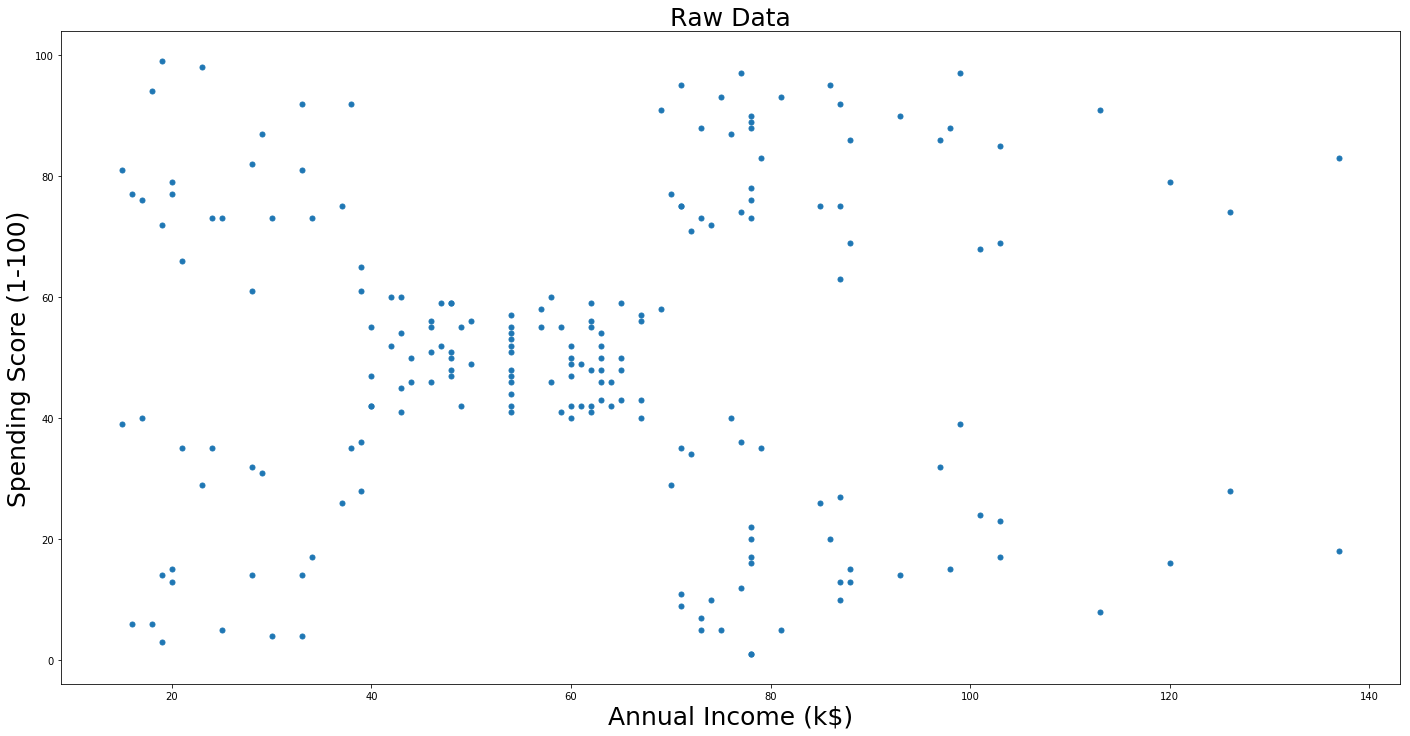

In [22]:
plt.figure(figsize=(24,12))
#plt.scatter(X[:,0], X[:,1], s = 25)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], s = 25)
plt.title('Raw Data',fontsize=25)
plt.xlabel('Annual Income (k$)',fontsize=25)
plt.ylabel('Spending Score (1-100)',fontsize=25)
plt.show()

* ### **K-Means Algorithm**
https://www.youtube.com/watch?v=_aWzGGNrcic

**Please visit following link for information on how K-Means works**

[]
![https://medium.com/datadriveninvestor/k-means-clustering-b89d349e98e6](https://cdn-images-1.medium.com/max/1000/1*ZN6cDw34wEO-dxydDwY4vA.png)

Let's use the **'Elbow Method'** to determine the appropriate number of clusters to use
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

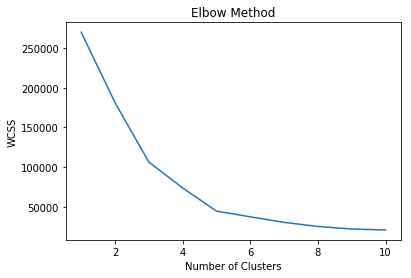

In [25]:
#Elbow Method' helps to determine the appropriate number of clusters to use
wcss = [] #Within-Cluster Sum of Square (WCSS)
iterations = 500
num_centroid_seeds = 10
rand_state = 0

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = iterations, n_init = num_centroid_seeds, random_state = rand_state)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above we can see that the **optimal number of clusters is 5**

In [31]:
#Finding kmeans using no. of clusters = 5
kmeans = KMeans(n_clusters = 5, max_iter = iterations, n_init = num_centroid_seeds, random_state = rand_state)
kmeans_preds = kmeans.fit_predict(X)
kmeans_preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### **Plot the customers with centroids from KMeans Algorithm**
https://www.youtube.com/watch?v=zPJtDohab-g

IndexError: list index out of range

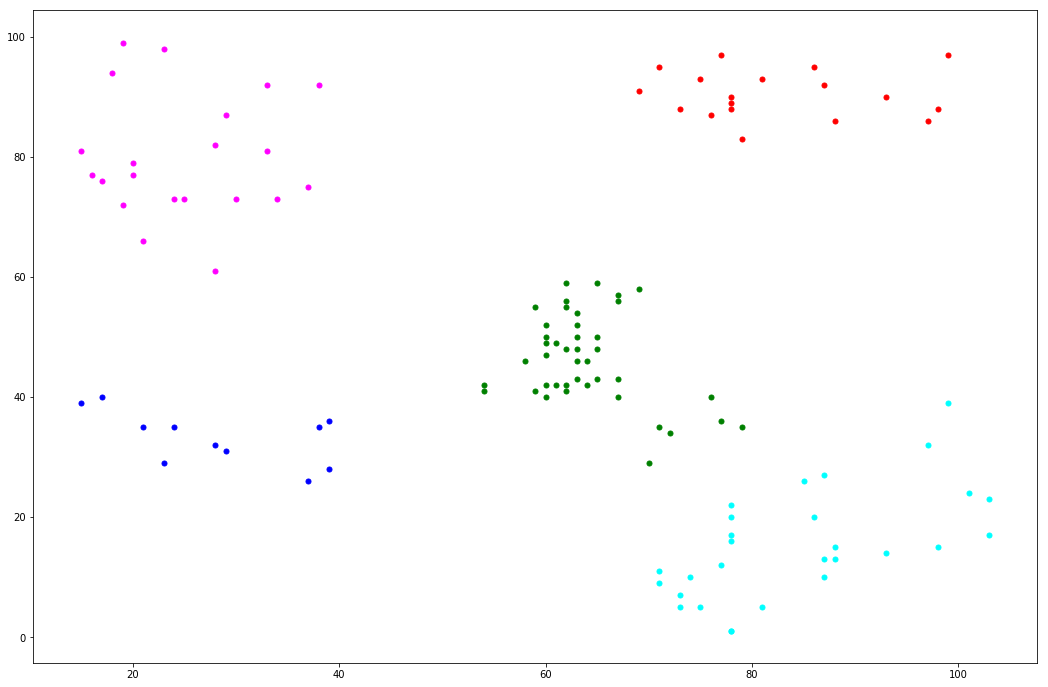

In [30]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (18,12))
for i in range(5):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

### **Agglomerative Hierarchical Clustering Algorithm**
It’s also known as **AGNES (Agglomerative Nesting)**. It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster ( or few big clusters).

![](http://www.sthda.com/sthda/RDoc/images/hierarchical-clustering-agnes-diana.png)
**Create our dendrogram**

In [ ]:
plt.figure(figsize = (25,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

**Perfrom Agglomerative Clustering**

In [ ]:

agg_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
agg_preds = agg_clustering.fit_predict(X)

**Plot our clusters**

In [ ]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (18,12))
for i in range(5):
    plt.scatter(X[agg_preds == i,0], X[agg_preds == i,1], s = point_size, c = colors[i], label = labels[i])

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

**COMMENTS:**  You will not see much difference in the data points **before and after** doing **AgglomerativeClustering**. You will find the difference in next section, where you will see that **Cluster Boundaries** are more clear in  **Agglomerative Clustering** as compared to **K-Means Clustering**.

### **Compare KMeans to Agglomerative Clusters**

In [ ]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (25,7))

plt.subplot(1,2,1)
for i in range(5):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')

plt.subplot(1,2,2)
for i in range(5):
    plt.scatter(X[agg_preds == i,0], X[agg_preds == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.title('Clusters of Clients (Agglomerative)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')

plt.show()

**COMMENTS:**  With close observation you will see that in  **AgglomerativeClustering** one of the customer who was earlier classified as **Careless Customer** is now classifed as **Standard Customer**.  And two of the **Carefull Customers** are classifed as **Standard Customers**.  With this approach we have **Clear Boundaries** as compared to **K-Means Clustering** algorithm.

### **In conclusion we can see that Hierarchical Clustering seems to produce better results than K-Means Clustering**